# Setup

In [1]:
import matplotlib.pyplot as plt
import zfit
from zfit import z  # math backend of zfit
import numpy as np
import pandas as pd
import tensorflow as tf
import time

/home/carlos/anaconda3/envs/zfit_latest/lib/python3.8/site-packages/zfit/__init__.py:50: UserWarning: This is an ALPHA version of zfit for feature testing, do NOT use it in production! It is NOT stable and contains bugs and untested features. For production use, please use the last beta stable version of zfit.
  warnings.warn(
/home/carlos/anaconda3/envs/zfit_latest/lib/python3.8/site-packages/zfit/__init__.py:62: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(


In [2]:
from math import ceil

In [3]:
from scipy import stats

In [4]:
#KS test from scypy to get p-values

from scipy.stats import cramervonmises, kstest, cramervonmises_2samp

In [5]:
# Following https://stackoverflow.com/a/64604031
import sys

from pathlib import Path

In [6]:
# in jupyter (lab / notebook), based on notebook path
module_path = str(Path.cwd().parents[2]/"scripts")

if module_path not in sys.path:
    sys.path.append(module_path)
    
data_path = str(Path.cwd().parents[2] / "data" / "EfficiencyData" )

In [7]:
# Modules made by Horacio

import zfitEffy
import customPDFs
import plot_tools

In [8]:
zfit_w_data = []
bin_names = ['-1','0','1','2','4','6','7','8','9','10','Complete']
#bin_names = [4]

# Bin and sample size

In [9]:
# Set the bin for which you want to calculate

bin_name = 'Complete'

In [10]:
# Set the number of samples

n_samples = 1000

In [11]:
max_degree = 15

In [12]:
bins = 20

In [13]:
# Test variables 

min_median = 0.5
min_slope = 0.0

best_deg_slope = 0
best_deg_median = 0

# Importing data

In [14]:
cos_np = np.linspace(-1, 1, 1000)

In [15]:
cos = zfit.Space('cosThetaKMu', [-1,1])

In [16]:
testing_bin = bin_names.index(bin_name)
bin_names[testing_bin]

'Complete'

In [17]:
binned_dataframe = pd.read_csv(data_path + "/PHSP_Corrected_"+bin_names[testing_bin]+".csv")

In [18]:
zfit_w_data = zfit.Data.from_pandas(pd.DataFrame(binned_dataframe.cosThetaKMu), cos, weights=binned_dataframe.totalW)


# Models

In [19]:
models, parameters  = zfitEffy.create_bernstein_models(obs=cos, max_degree=max_degree, ret_params=True, name=bin_name)

In [20]:
models

{0: <zfit.<class 'customPDFs.bernstein'>  params=[Complete_c^0_0],
 1: <zfit.<class 'customPDFs.bernstein'>  params=[Complete_c^0_1, Complete_c^1_1],
 2: <zfit.<class 'customPDFs.bernstein'>  params=[Complete_c^0_2, Complete_c^1_2, Complete_c^2_2],
 3: <zfit.<class 'customPDFs.bernstein'>  params=[Complete_c^0_3, Complete_c^1_3, Complete_c^2_3, Complete_c^3_3],
 4: <zfit.<class 'customPDFs.bernstein'>  params=[Complete_c^0_4, Complete_c^1_4, Complete_c^2_4, Complete_c^3_4, Complete_c^4_4],
 5: <zfit.<class 'customPDFs.bernstein'>  params=[Complete_c^0_5, Complete_c^1_5, Complete_c^2_5, Complete_c^3_5, Complete_c^4_5, Complete_c^5_5],
 6: <zfit.<class 'customPDFs.bernstein'>  params=[Complete_c^0_6, Complete_c^1_6, Complete_c^2_6, Complete_c^3_6, Complete_c^4_6, Complete_c^5_6, Complete_c^6_6],
 7: <zfit.<class 'customPDFs.bernstein'>  params=[Complete_c^0_7, Complete_c^1_7, Complete_c^2_7, Complete_c^3_7, Complete_c^4_7, Complete_c^5_7, Complete_c^6_7, Complete_c^7_7],
 8: <zfit.<class

In [21]:
parameters

[[<zfit.Parameter 'Complete_c^0_0' floating=True value=0.1>],
 [<zfit.Parameter 'Complete_c^0_1' floating=True value=0.1>,
  <zfit.Parameter 'Complete_c^1_1' floating=True value=0.1>],
 [<zfit.Parameter 'Complete_c^0_2' floating=True value=0.1>,
  <zfit.Parameter 'Complete_c^1_2' floating=True value=0.1>,
  <zfit.Parameter 'Complete_c^2_2' floating=True value=0.1>],
 [<zfit.Parameter 'Complete_c^0_3' floating=True value=0.1>,
  <zfit.Parameter 'Complete_c^1_3' floating=True value=0.1>,
  <zfit.Parameter 'Complete_c^2_3' floating=True value=0.1>,
  <zfit.Parameter 'Complete_c^3_3' floating=True value=0.1>],
 [<zfit.Parameter 'Complete_c^0_4' floating=True value=0.1>,
  <zfit.Parameter 'Complete_c^1_4' floating=True value=0.1>,
  <zfit.Parameter 'Complete_c^2_4' floating=True value=0.1>,
  <zfit.Parameter 'Complete_c^3_4' floating=True value=0.1>,
  <zfit.Parameter 'Complete_c^4_4' floating=True value=0.1>],
 [<zfit.Parameter 'Complete_c^0_5' floating=True value=0.1>,
  <zfit.Parameter '

# Minimization

In [22]:
minimizer = zfit.minimize.Minuit()

In [23]:
# First get the minimization of all models in the same bin, then generalize to multiple bins
#Working just with 4th bin for now

start_time = time.time()

i=0
nll_bin = []
minimums = []
results = []
while i < max_degree:
    nll_bin.append(zfit.loss.UnbinnedNLL(model=models[i], data=zfit_w_data))
    minimums.append(minimizer.minimize(loss=nll_bin[i]))
    results.append(minimums[i].hesse())
    i=i+1
    
print("Minimization time for", max_degree, "polynomials to run:", time.time() - start_time, "seconds")

/home/carlos/anaconda3/envs/zfit_latest/lib/python3.8/site-packages/zfit/minimizers/fitresult.py:1170: ChangedFeatureWarning: The behavior of this functionality recently changed.To turn this warning off, use `zfit.settings.changed_warnings.hesse_name = False`  or 'all' with `zfit.settings.changed_warnings.all = False
Default name of hesse (which is currently the method name such as `minuit_hesse`or `hesse_np`) has changed to `hesse` (it still adds the old one as well. This will be removed in the future). INSTRUCTIONS: to stay compatible,  change wherever you access the error to 'hesse' (if you don't explicitly specify the name in hesse(...).
  warn_changed_feature(message, "hesse_name")


Minimization time for 15 polynomials to run: 345.3384573459625 seconds


# Comparison between all the models

In [24]:
data_samples = []

j=0

# Cambio de la cantidad de muestras a la suma de los pesos
start_time = time.time()
for j in range(n_samples):
    samples_models = []
    i=0
    for model in models:
        samples_models.append(models[i].create_sampler(n = ceil(binned_dataframe.totalW.sum()), fixed_params=True))
        i=i+1
    data_samples.append(samples_models)
print("Creating the samples for", max_degree, "polynomials to run:", time.time() - start_time, "seconds")

Creating the samples for 15 polynomials to run: 723.770233631134 seconds


## KS Test

In [25]:
class test_result:
    def __init__(self, statistic, pvalue, degree):
        self.statistic = statistic
        self.pvalue = pvalue
        self.degree = degree

In [26]:
from ks_test import ks_2samp_weighted

In [27]:
data_samples[0]

In [28]:
ks_list = []
statistic_list = []

j=0

start_time = time.time()

for samples_models in data_samples:
    ks_results = []
    best_ks_result = test_result(1,0,-1)
    best_index_ks = 0

    i=0
    for sample in samples_models:
        ks_results.append({'kstest': ks_2samp_weighted( binned_dataframe.cosThetaKMu.to_numpy(),
                                      data_samples[j][i].to_pandas().to_numpy().flatten(),
                                      binned_dataframe.totalW
                                    ),
                           'deg': i})
        i=i+1
    ks_list.append(ks_results)
    j=j+1
print("Making the ks-test for", max_degree, "polynomials to run:", time.time() - start_time, "seconds")

Making the ks-test for 15 polynomials to run: 154.37316989898682 seconds


In [29]:
ks_list[0][2]['kstest'][1] #[1]: pvalue; [0]: statistic

0.04120686881840609

In [30]:
import os

In [31]:
# Path to export plots

results_path = 'plots/pval/'

In [32]:
results_path

'plots/pval/'

In [33]:
# pval_deg = 0
# val_name = ["statictic", "p-value"][0] # "p-value"
# for i in range(max_degree):
#     pval_arr = []
#     for item in ks_list:
#         pval_arr.append(item[0][pval_deg]['kstest'][0]) #[1]: pvalue; [0]: statistic
#     plt.hist(pval_arr, bins=20)
#     plt.title(val_name + ' distribution for Bernstein deg ' + str(pval_deg))
#     plt.xlabel(val_name)
#     plt.ylabel('Frequency')

#     plt.savefig(results_path+val_name+'_dist_deg'+str(pval_deg)+'.png')
    
#     pval_deg = pval_deg+1
    
#     plt.show()

In [34]:
# A function that helps me get an array for x and y values of the p-value distribution

def pvalfit(pval_arr, bins=20):
    y_values = np.histogram(pval_arr)
    x_values = pval_arr
    
    

In [35]:
pval_arr = []
for item in ks_list:
        pval_arr.append(item[0]['kstest'][1]) 
hist_values = np.histogram(pval_arr, bins=20)
hist_values

(array([935,  29,  11,   8,   3,   2,   4,   1,   1,   0,   1,   1,   0,
          0,   1,   0,   2,   0,   0,   1]),
 array([4.05332626e-16, 4.43140083e-08, 8.86280161e-08, 1.32942024e-07,
        1.77256032e-07, 2.21570040e-07, 2.65884048e-07, 3.10198055e-07,
        3.54512063e-07, 3.98826071e-07, 4.43140079e-07, 4.87454087e-07,
        5.31768095e-07, 5.76082103e-07, 6.20396111e-07, 6.64710118e-07,
        7.09024126e-07, 7.53338134e-07, 7.97652142e-07, 8.41966150e-07,
        8.86280158e-07]))

In [36]:
# for item in ks_list:
#     pval_arr.append(item[pval_deg]['kstest'][1]) 
# y_values = np.histogram(ks_list[0][0]['kstest'][1], bins=20)

## Plotting p-values

In [37]:
# Font dictionary for figure equations

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }

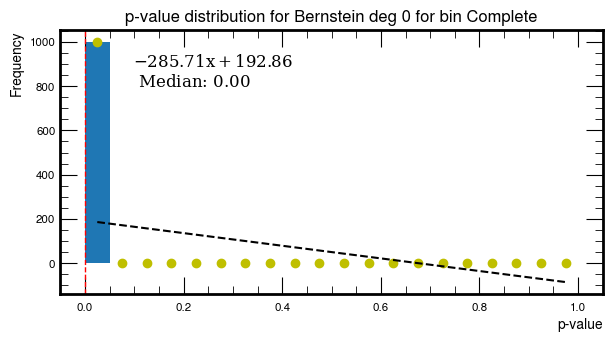

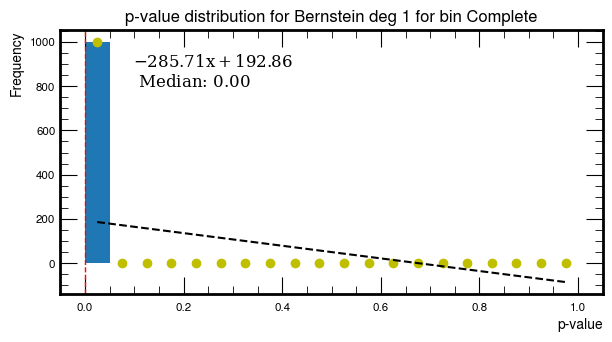

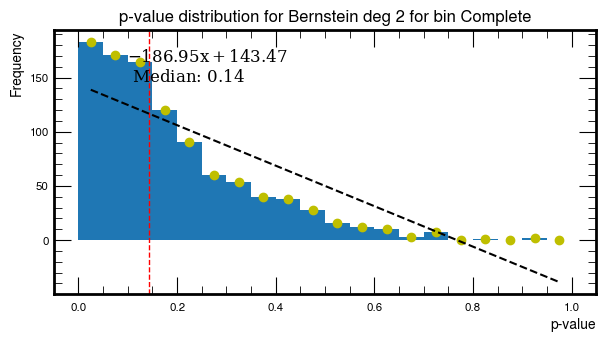

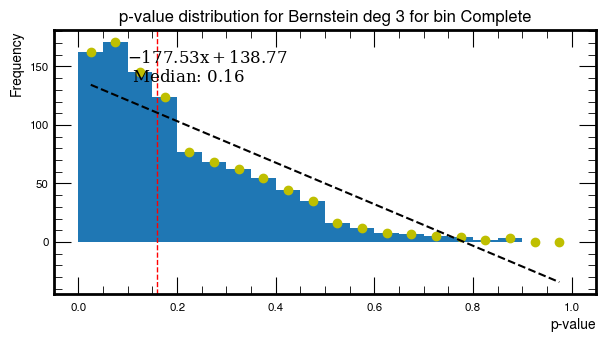

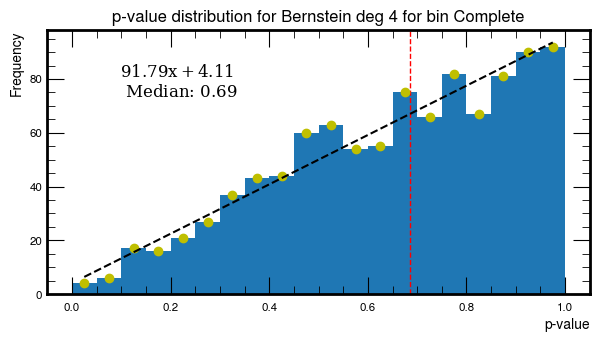

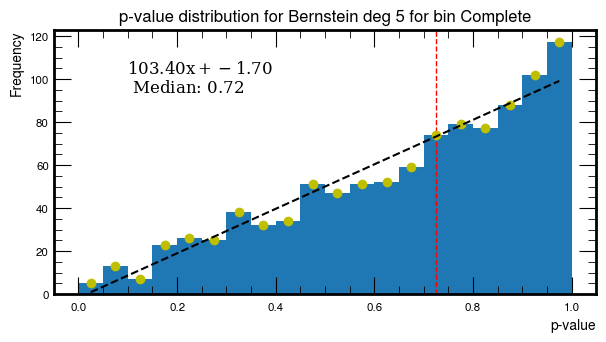

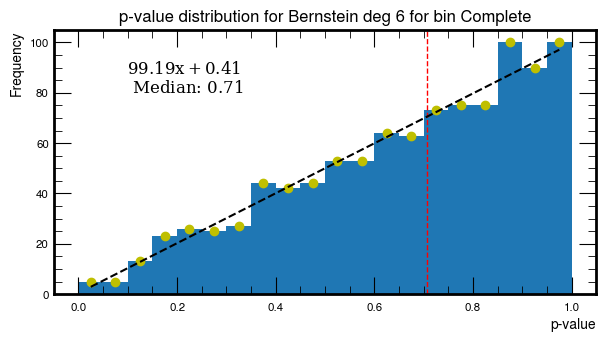

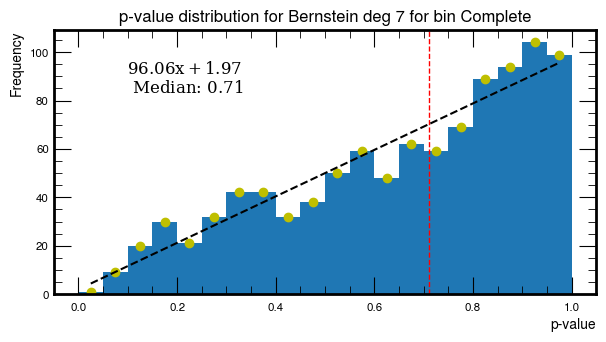

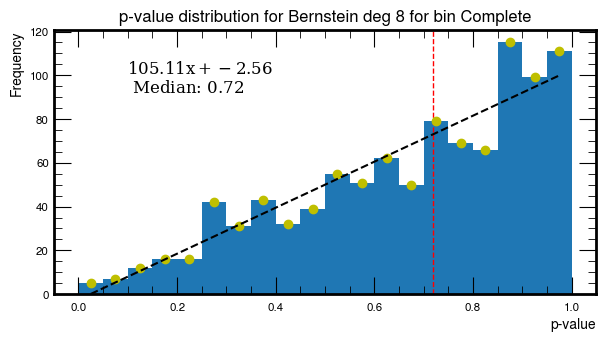

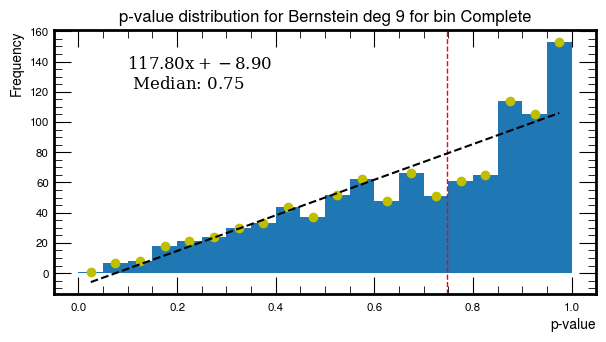

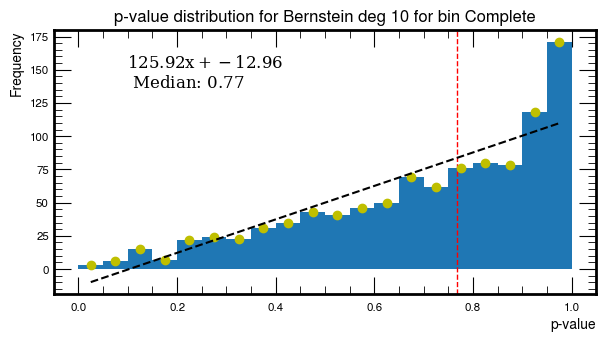

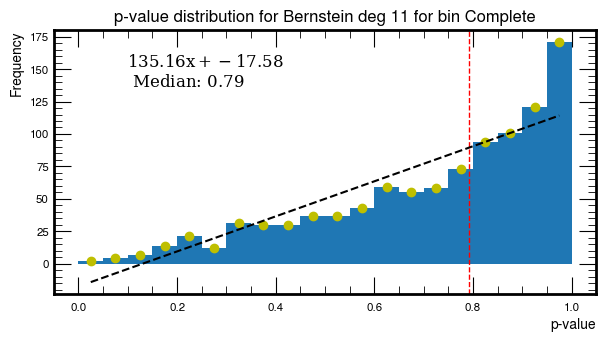

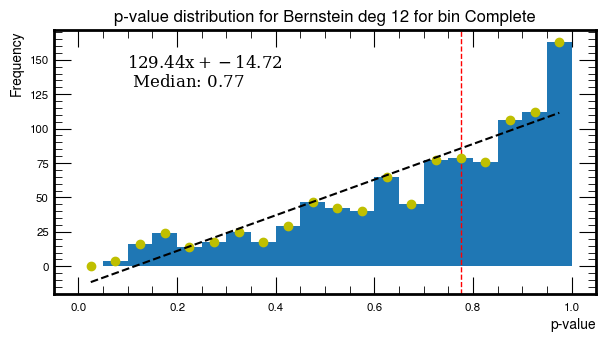

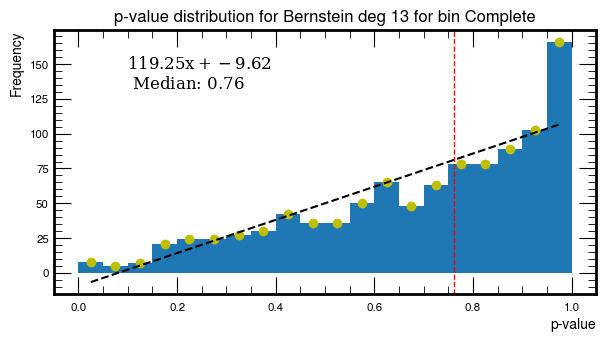

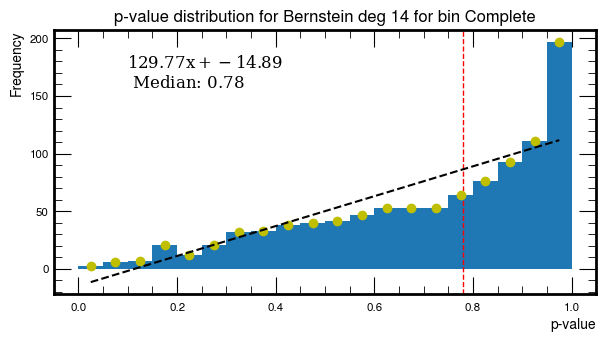

In [38]:
pval_deg = 0
pval_fits = []
pval_hist_list = []
coefs_pval = []
median_list = []
i=0
val_name = ["statictic", "p-value"][1] # Choose between protting statistic [0] & p-values [1]

for i in range(max_degree):
    
    plt.subplots(figsize=(7, 3.5), dpi=100)
    
    #plt.xlim(0,1)
    
    pval_arr = []
    x_values = []
    y_values = []
    for item in ks_list:
        pval_arr.append(item[pval_deg]['kstest'][1]) #[1]: pvalue; [0]: statistic
    pval_hist_list.append(np.histogram(pval_arr, bins=bins, range=(0,1)))
    y_values = pval_hist_list[pval_deg][0]
    
    # Getting the x-values for the histogram
    
    i_bin = 0
    width = 1.0/20
    for i_bin in range(bins):
        # x_values.append((pval_hist_list[pval_deg][1][i_bin] + pval_hist_list[pval_deg][1][i_bin+1]) / 2 )
        x_values.append(width/2 + width*i_bin)
    
    coefs_pval.append(np.polyfit(x_values, y_values, 1))
    poly1d_fn = np.poly1d(coefs_pval[i]) 
    # poly1d_fn is now a function which takes in x and returns an estimate for y
    median_list.append(np.median(pval_arr))
    
    plt.axvline(np.median(pval_arr), color='red', linestyle='dashed', linewidth=1 )
    
    y_coord = 0.8*np.max(y_values)
    x_coord = 0.1*np.max(x_values)
    
    plt.text(x_coord, y_coord , '$'+ "{:.2f}".format(coefs_pval[i][0]) +  'x+' + 
             "{:.2f}".format(coefs_pval[i][1]) +'$\n Median: $'+"{:.2f}".format(median_list[i])+'$',
             fontdict=font 
            )
    
    plt.hist(pval_arr, bins=bins, range=(0,1))
    plt.title(val_name + ' distribution for Bernstein deg ' + str(pval_deg) +' for bin ' + bin_name)
    plt.xlabel(val_name)
    plt.ylabel('Frequency')
        
    plt.plot(x_values, y_values, 'yo', x_values, poly1d_fn(x_values), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker

    plt.savefig(results_path+val_name+'_dist_deg_'+str(pval_deg)+'-bin_'+bin_name+'.png')
    
    pval_deg = pval_deg+1
    
    plt.show()

In [39]:
print ("{:<8} {:<20} {:<20}  {:<20}".format('Deg','Slope','Incercept', 'Median'))
i=0
for coef in coefs_pval:
    print ("{:<8} {:<20} {:<20} {:<20}".format(i, coef[0],coef[1], median_list[i]))
    i = i+1

Deg      Slope                Incercept             Median              
0        -285.7142857142863   192.85714285714315   3.638097436602196e-10
1        -285.7142857142863   192.85714285714315   2.812138834105628e-08
2        -186.94736842105272  143.4736842105263    0.1432432294260724  
3        -177.53383458646618  138.7669172932331    0.1582977640590745  
4        91.78947368421052    4.105263157894744    0.6857369880844727  
5        103.39849624060152   -1.6992481203007477  0.7239993986874202  
6        99.18796992481202    0.4060150375939954   0.7074479933727725  
7        96.06015037593984    1.96992481203009     0.7111188348432065  
8        105.11278195488723   -2.5563909774435882  0.718084419262419   
9        117.80451127819549   -8.902255639097726   0.7479804895655082  
10       125.92481203007516   -12.96240601503758   0.7685586589661102  
11       135.1578947368421    -17.57894736842104   0.791303238035185   
12       129.4436090225564    -14.72180451127819   0.77495622

In [40]:
# Exporting a .csv with the values

slopes = {'deg':[], 'slope':[], 'intercept':[], 'median':[]}


i=0
for coef in coefs_pval:
    slopes['deg'].append(i)
    slopes['slope'].append(coef[0])
    slopes['intercept'].append(coef[1])
    slopes['median'].append(median_list[i])
    i = i+1

In [41]:
slopes

{'deg': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 'slope': [-285.7142857142863,
  -285.7142857142863,
  -186.94736842105272,
  -177.53383458646618,
  91.78947368421052,
  103.39849624060152,
  99.18796992481202,
  96.06015037593984,
  105.11278195488723,
  117.80451127819549,
  125.92481203007516,
  135.1578947368421,
  129.4436090225564,
  119.24812030075186,
  129.77443609022552],
 'intercept': [192.85714285714315,
  192.85714285714315,
  143.4736842105263,
  138.7669172932331,
  4.105263157894744,
  -1.6992481203007477,
  0.4060150375939954,
  1.96992481203009,
  -2.5563909774435882,
  -8.902255639097726,
  -12.96240601503758,
  -17.57894736842104,
  -14.72180451127819,
  -9.624060150375923,
  -14.887218045112759],
 'median': [3.638097436602196e-10,
  2.812138834105628e-08,
  0.1432432294260724,
  0.1582977640590745,
  0.6857369880844727,
  0.7239993986874202,
  0.7074479933727725,
  0.7111188348432065,
  0.718084419262419,
  0.7479804895655082,
  0.7685586589661102,
  0.

In [42]:
slopes_df = pd.DataFrame(slopes)
slopes_df

,deg,slope,intercept,median
0,0,-285.714286,192.857143,3.638097e-10
1,1,-285.714286,192.857143,2.812139e-08
2,2,-186.947368,143.473684,1.432432e-01
3,3,-177.533835,138.766917,1.582978e-01
4,4,91.789474,4.105263,6.857370e-01
5,5,103.398496,-1.699248,7.239994e-01
6,6,99.187970,0.406015,7.074480e-01
7,7,96.060150,1.969925,7.111188e-01
8,8,105.112782,-2.556391,7.180844e-01
9,9,117.804511,-8.902256,7.479805e-01


In [43]:
filepath = Path('slopes/linear_fit_median_bin_'+bin_name+'.csv')  

filepath.parent.mkdir(parents=True, exist_ok=True)  

slopes_df.to_csv(filepath) 

# Comparison of minimization results

Comparando los valores de los ajustes obtenidos por este programa con los obtenidos por Horacio.

In [44]:
import tools

In [45]:
# Setting the route to the data directory

eff_path = str(Path.cwd().parents[2] / "data" / "Efficiency" )
test_res_path = str(Path.cwd().parents[2]/ "results" / "Efficiency")

In [46]:
# Selecting the best degree with the p-value test by slope
best_slope = False

for slope in slopes_df['slope']:
    if slope > min_slope:
        best_slope = slope
        best_deg_slope = slopes['slope'].index(best_slope)
        break
if not best_slope:
    best_slope = max(slopes_df['slope'])
    best_deg_slope = slopes['slope'].index(best_slope)
print(best_slope, best_deg_slope)

91.78947368421052 4


In [47]:
# Selecting the best degree with the p-value test by median

best_median = False

for median in slopes_df['median']:
    if median > min_median:
        best_median = median
        best_deg_median = slopes['median'].index(best_median)
        break
if not best_median:
    best_median = max(slopes_df['median'])
    best_deg_median = slopes['median'].index(best_median)
print(best_median, best_deg_median)

0.6857369880844727 4


In [48]:
best_deg = min([best_deg_median, best_deg_slope])
best_deg

4

In [49]:
results[2]

{<zfit.Parameter 'Complete_c^0_2' floating=True value=0.07882>: {'error': 0.002367169726710589,
  'cl': 0.68268949},
 <zfit.Parameter 'Complete_c^1_2' floating=True value=0.2393>: {'error': 0.00951029627976606,
  'cl': 0.68268949},
 <zfit.Parameter 'Complete_c^2_2' floating=True value=0.08812>: {'error': 0.002135661592212726,
  'cl': 0.68268949}}

In [50]:
minimums[2]

FitResult of
<UnbinnedNLL model=[<zfit.<class 'customPDFs.bernstein'>  params=[Complete_c^0_2, Complete_c^1_2, Complete_c^2_2]] data=[<zfit.core.data.Data object at 0x7f983b569d30>] constraints=[]> 
with
<Minuit Minuit tol=0.001>

╒═════════╤═════════════╤══════════════════╤═══════╤═════════════╕
│ valid   │ converged   │ param at limit   │ edm   │ min value   │
╞═════════╪═════════════╪══════════════════╪═══════╪═════════════╡
│ True    │ True        │ False            │ 1e-08 │ 795.8902    │
╘═════════╧═════════════╧══════════════════╧═══════╧═════════════╛

Parameters
name                  hesse      value    at limit
--------------  -----------  ---------  ----------
Complete_c^0_2  +/-  0.0024  0.0788234       False
Complete_c^1_2  +/-  0.0095   0.239255       False
Complete_c^2_2  +/-  0.0021  0.0881212       False

In [51]:
minimums[2].covariance()

array([[ 5.60349256e-06, -1.06916460e-05, -2.42308492e-06],
       [-1.06916460e-05,  9.04457361e-05, -1.10638729e-05],
       [-2.42308492e-06, -1.10638729e-05,  4.56105048e-06]])

In [52]:
minimums[2].fmin

795.8902317573325

In [53]:
minimums[2].edm

1.0485617404550439e-08

In [54]:
param_hesse = minimums[2].hesse()
print(param_hesse)

{<zfit.Parameter 'Complete_c^0_2' floating=True value=0.07882>: {'error': 0.002367169726710589, 'cl': 0.68268949}, <zfit.Parameter 'Complete_c^1_2' floating=True value=0.2393>: {'error': 0.00951029627976606, 'cl': 0.68268949}, <zfit.Parameter 'Complete_c^2_2' floating=True value=0.08812>: {'error': 0.002135661592212726, 'cl': 0.68268949}}


In [55]:
# param_errors, _ = minimums[2].errors()

# param_errors

In [56]:
bin_name_path = bin_name

params_json = tools.read_json(eff_path+f'/Nominal_eff_Bin{bin_name_path}.json')

params_json

{'Complete_c^0_4': {'value': 0.06258265386001823},
 'Complete_c^1_4': {'value': 0.2547363461683115},
 'Complete_c^2_4': {'value': 0.05048462597024004},
 'Complete_c^3_4': {'value': 0.2584291084513001},
 'Complete_c^4_4': {'value': 0.07196502028966345},
 'covariance': [[3.373372444675904e-05,
   -4.634630536162625e-05,
   9.365188339820165e-05,
   -1.9581489831262538e-05,
   1.5472992990408717e-05],
  [-4.634630536162625e-05,
   8.646398474797932e-05,
   -0.00013613980754724649,
   8.458831402507576e-06,
   -2.325418049849506e-05],
  [9.365188339820165e-05,
   -0.00013613980754724649,
   0.0005198118351727871,
   -0.0001413363095220654,
   0.00010400885320598232],
  [-1.9581489831262538e-05,
   8.458831402507576e-06,
   -0.0001413363095220654,
   9.540006278536194e-05,
   -5.3800681030949746e-05],
  [1.5472992990408717e-05,
   -2.325418049849506e-05,
   0.00010400885320598232,
   -5.3800681030949746e-05,
   3.850606021695058e-05]],
 'covariance_params': ['c^0_4', 'c^1_4', 'c^2_4', 'c^3_

In [57]:
# Saving results of minimization to a similar format

# To-do: Make so that this saves for the current best_deg_test and adds the parameters autocatically

results_format = {
    # parameters[2][0].name: parameters[2][0].value().numpy(),
    # parameters[2][1].name: parameters[2][1].value().numpy(),
    # parameters[2][2].name: parameters[2][2].value().numpy(),
    'covariance': minimums[best_deg].covariance().tolist(),
    'covariance_params': list(), # [parameters[2][0].name, parameters[2][1].name, parameters[2][2].name],
    'fmin': minimums[best_deg].fmin,
    'status': minimums[best_deg].status,
    'valid': minimums[best_deg].valid,
    'converged': minimums[best_deg].converged,
    'edm': minimums[best_deg].edm,
    'params_at_limit': minimums[best_deg].params_at_limit
}

for idx, param in enumerate(parameters[best_deg]):
    results_format[parameters[best_deg][idx].name] = param.value().numpy()
    results_format['covariance_params'].append(parameters[best_deg][idx].name)

results_format

{'covariance': [[3.370203387597977e-05,
   -4.8339436567787345e-05,
   9.476234866850688e-05,
   -2.105602887517792e-05,
   1.5063746345761165e-05],
  [-4.8339436567787345e-05,
   9.319606199474605e-05,
   -0.00014828700910118312,
   1.3666229094635653e-05,
   -2.5152884575946985e-05],
  [9.476234866850688e-05,
   -0.00014828700910118312,
   0.0005439089163435319,
   -0.0001549249728017614,
   0.00010612424923321003],
  [-2.105602887517792e-05,
   1.3666229094635653e-05,
   -0.0001549249728017614,
   0.00010380071833123511,
   -5.6865231958122386e-05],
  [1.5063746345761165e-05,
   -2.5152884575946985e-05,
   0.00010612424923321003,
   -5.6865231958122386e-05,
   3.882711945056163e-05]],
 'covariance_params': ['Complete_c^0_4',
  'Complete_c^1_4',
  'Complete_c^2_4',
  'Complete_c^3_4',
  'Complete_c^4_4'],
 'fmin': 775.0486896783634,
 'status': 0,
 'valid': True,
 'converged': True,
 'edm': 3.763573756066938e-06,
 'params_at_limit': False,
 'Complete_c^0_4': 0.06185108795762062,
 'Com

In [58]:
import json 

In [59]:
# Saving json to file path

with open(test_res_path+f'/pvalue_test_Bin{bin_name_path}.json', 'w') as json_file:
    json.dump(results_format, json_file)

# Fitting from initial values

In [60]:
test_model_name = "h_"

In [61]:
initial_params = list()

for key in params_json:
    if 'c^' in key:
        initial_params.append(params_json[key]['value'])

In [62]:
initial_params

[0.06258265386001823,
 0.2547363461683115,
 0.05048462597024004,
 0.2584291084513001,
 0.07196502028966345]

In [63]:
best_deg_test = len(initial_params)-1

In [64]:
best_deg_test

4

In [65]:
models_test, parameters_test  = zfitEffy.create_bernstein_models(obs=cos, 
                                                                 max_degree=max_degree, 
                                                                 ret_params=True, 
                                                                 name=test_model_name, 
                                                                 initial_values=initial_params
                                                                )

In [66]:
models_test

{0: <zfit.<class 'customPDFs.bernstein'>  params=[h__c^0_0],
 1: <zfit.<class 'customPDFs.bernstein'>  params=[h__c^0_1, h__c^1_1],
 2: <zfit.<class 'customPDFs.bernstein'>  params=[h__c^0_2, h__c^1_2, h__c^2_2],
 3: <zfit.<class 'customPDFs.bernstein'>  params=[h__c^0_3, h__c^1_3, h__c^2_3, h__c^3_3],
 4: <zfit.<class 'customPDFs.bernstein'>  params=[h__c^0_4, h__c^1_4, h__c^2_4, h__c^3_4, h__c^4_4],
 5: <zfit.<class 'customPDFs.bernstein'>  params=[h__c^0_5, h__c^1_5, h__c^2_5, h__c^3_5, h__c^4_5, h__c^5_5],
 6: <zfit.<class 'customPDFs.bernstein'>  params=[h__c^0_6, h__c^1_6, h__c^2_6, h__c^3_6, h__c^4_6, h__c^5_6, h__c^6_6],
 7: <zfit.<class 'customPDFs.bernstein'>  params=[h__c^0_7, h__c^1_7, h__c^2_7, h__c^3_7, h__c^4_7, h__c^5_7, h__c^6_7, h__c^7_7],
 8: <zfit.<class 'customPDFs.bernstein'>  params=[h__c^0_8, h__c^1_8, h__c^2_8, h__c^3_8, h__c^4_8, h__c^5_8, h__c^6_8, h__c^7_8, h__c^8_8],
 9: <zfit.<class 'customPDFs.bernstein'>  params=[h__c^0_9, h__c^1_9, h__c^2_9, h__c^3_9, h

In [67]:
parameters_test

[[<zfit.Parameter 'h__c^0_0' floating=True value=0.1>],
 [<zfit.Parameter 'h__c^0_1' floating=True value=0.1>,
  <zfit.Parameter 'h__c^1_1' floating=True value=0.1>],
 [<zfit.Parameter 'h__c^0_2' floating=True value=0.1>,
  <zfit.Parameter 'h__c^1_2' floating=True value=0.1>,
  <zfit.Parameter 'h__c^2_2' floating=True value=0.1>],
 [<zfit.Parameter 'h__c^0_3' floating=True value=0.1>,
  <zfit.Parameter 'h__c^1_3' floating=True value=0.1>,
  <zfit.Parameter 'h__c^2_3' floating=True value=0.1>,
  <zfit.Parameter 'h__c^3_3' floating=True value=0.1>],
 [<zfit.Parameter 'h__c^0_4' floating=True value=0.06258>,
  <zfit.Parameter 'h__c^1_4' floating=True value=0.2547>,
  <zfit.Parameter 'h__c^2_4' floating=True value=0.05048>,
  <zfit.Parameter 'h__c^3_4' floating=True value=0.2584>,
  <zfit.Parameter 'h__c^4_4' floating=True value=0.07197>],
 [<zfit.Parameter 'h__c^0_5' floating=True value=0.1>,
  <zfit.Parameter 'h__c^1_5' floating=True value=0.1>,
  <zfit.Parameter 'h__c^2_5' floating=True

# Plotting models

In [68]:
model_plot_path = 'plots/model_comparison/'

/home/carlos/scripts/plot_tools.py:904: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.all(weights=='none'):


'bernstein' object has no attribute 'models'


<Figure size 1050x525 with 0 Axes>

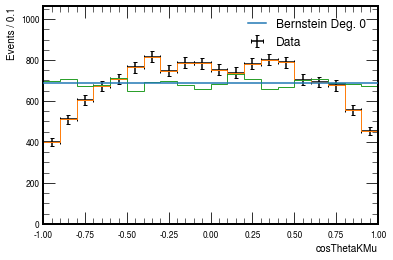

/home/carlos/scripts/plot_tools.py:904: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.all(weights=='none'):


'bernstein' object has no attribute 'models'


<Figure size 1050x525 with 0 Axes>

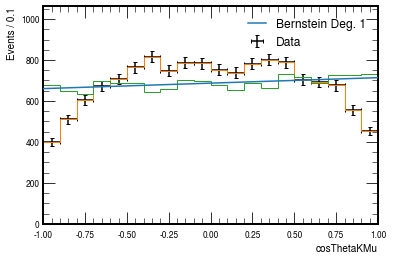

/home/carlos/scripts/plot_tools.py:904: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.all(weights=='none'):


'bernstein' object has no attribute 'models'


<Figure size 1050x525 with 0 Axes>

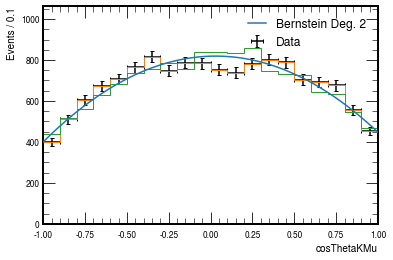

/home/carlos/scripts/plot_tools.py:904: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.all(weights=='none'):


'bernstein' object has no attribute 'models'


<Figure size 1050x525 with 0 Axes>

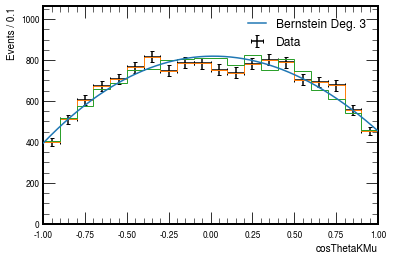

/home/carlos/scripts/plot_tools.py:904: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.all(weights=='none'):


'bernstein' object has no attribute 'models'


<Figure size 1050x525 with 0 Axes>

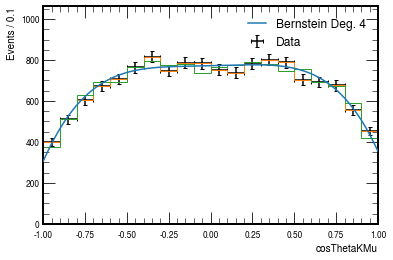

/home/carlos/scripts/plot_tools.py:904: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.all(weights=='none'):


'bernstein' object has no attribute 'models'


<Figure size 1050x525 with 0 Axes>

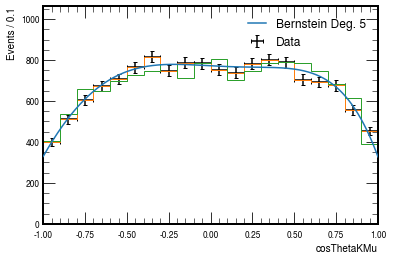

/home/carlos/scripts/plot_tools.py:904: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.all(weights=='none'):


'bernstein' object has no attribute 'models'


<Figure size 1050x525 with 0 Axes>

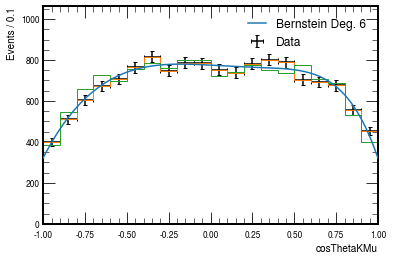

/home/carlos/scripts/plot_tools.py:904: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.all(weights=='none'):


'bernstein' object has no attribute 'models'


<Figure size 1050x525 with 0 Axes>

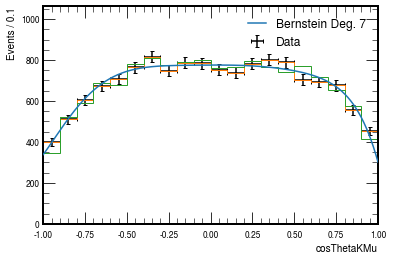

/home/carlos/scripts/plot_tools.py:904: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.all(weights=='none'):


'bernstein' object has no attribute 'models'


<Figure size 1050x525 with 0 Axes>

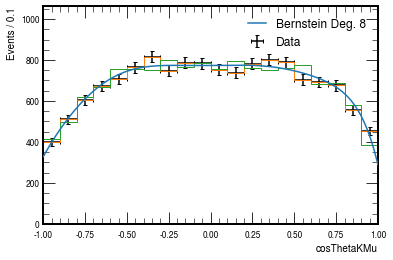

/home/carlos/scripts/plot_tools.py:904: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.all(weights=='none'):


'bernstein' object has no attribute 'models'


<Figure size 1050x525 with 0 Axes>

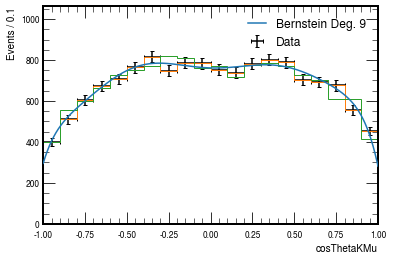

/home/carlos/scripts/plot_tools.py:904: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.all(weights=='none'):


'bernstein' object has no attribute 'models'


<Figure size 1050x525 with 0 Axes>

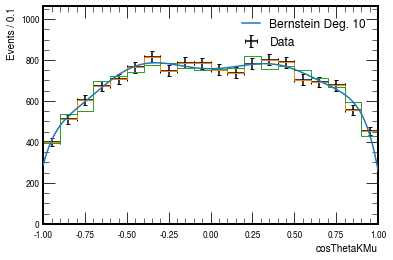

/home/carlos/scripts/plot_tools.py:904: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.all(weights=='none'):


'bernstein' object has no attribute 'models'


<Figure size 1050x525 with 0 Axes>

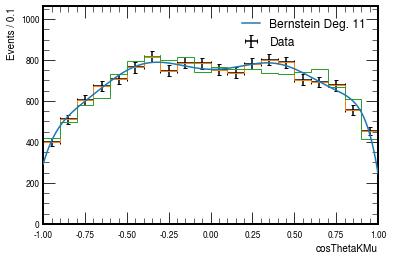

/home/carlos/scripts/plot_tools.py:904: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.all(weights=='none'):


'bernstein' object has no attribute 'models'


<Figure size 1050x525 with 0 Axes>

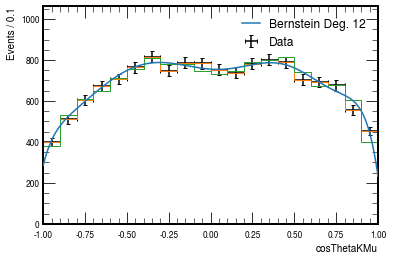

/home/carlos/scripts/plot_tools.py:904: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.all(weights=='none'):


'bernstein' object has no attribute 'models'


<Figure size 1050x525 with 0 Axes>

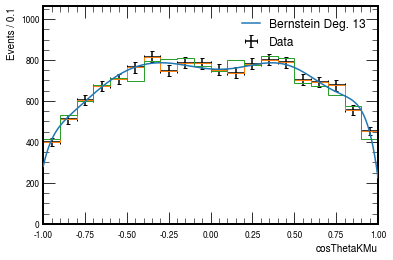

/home/carlos/scripts/plot_tools.py:904: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.all(weights=='none'):


'bernstein' object has no attribute 'models'


<Figure size 1050x525 with 0 Axes>

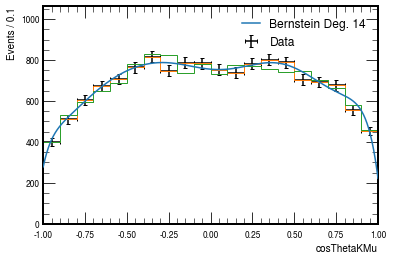

In [69]:
# change initial parameters of sample models to Horacio's values
# add that model to the plot

# bins = 20
deg = 0
for deg in range(max_degree):
    
    fig = plt.figure(figsize=(7, 3.5), dpi=150)
    
    plot_tools.plot_model(data= binned_dataframe.cosThetaKMu.to_numpy(),
                          pdf=models[deg], 
                          bins=bins, density=True, 
                          weights= binned_dataframe.totalW.to_numpy(),
                         )
    plt.hist(binned_dataframe.cosThetaKMu, bins=bins, range=[-1,1], weights= binned_dataframe.totalW.to_numpy(), histtype='step')
    plt.hist(data_samples[2][deg].to_pandas().to_numpy().flatten(), bins=bins, range=[-1,1], histtype='step')
    plt.legend(loc=1, prop={'size': 12})
    
    plt.savefig(model_plot_path+'model_sample_'+str(deg)+'_vs_data_bin_'+bin_name+'.png')
    
    plt.show()

In [70]:
best_deg

4

In [71]:
parameters_test[best_deg_test]

[<zfit.Parameter 'h__c^0_4' floating=True value=0.06258>,
 <zfit.Parameter 'h__c^1_4' floating=True value=0.2547>,
 <zfit.Parameter 'h__c^2_4' floating=True value=0.05048>,
 <zfit.Parameter 'h__c^3_4' floating=True value=0.2584>,
 <zfit.Parameter 'h__c^4_4' floating=True value=0.07197>]

/home/carlos/scripts/plot_tools.py:904: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.all(weights=='none'):


'bernstein' object has no attribute 'models'


<Figure size 1050x525 with 0 Axes>

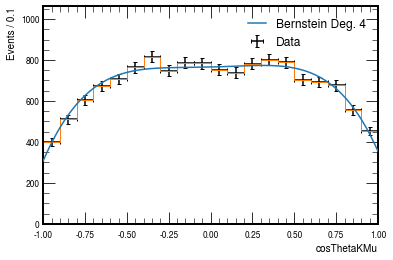

In [72]:
fig = plt.figure(figsize=(7, 3.5), dpi=150)

# plot_tools.plot_model(data= binned_dataframe.cosThetaKMu.to_numpy(),
#                       pdf=models[best_deg], 
#                       bins=bins, density=True, 
#                       weights= binned_dataframe.totalW.to_numpy(),
#                      )
plot_tools.plot_model(data= binned_dataframe.cosThetaKMu.to_numpy(),
                      pdf=models_test[best_deg_test], 
                      bins=bins, density=True, 
                      weights= binned_dataframe.totalW.to_numpy(),
                     )

plt.hist(binned_dataframe.cosThetaKMu, bins=bins, range=[-1,1], weights= binned_dataframe.totalW.to_numpy(), histtype='step')
plt.legend(loc=1, prop={'size': 12})

plt.savefig(model_plot_path+'model_sample_'+str(best_deg)+'_vs_chisq_results_'+str(best_deg_test)+'_'+bin_name+'.png')

plt.show()

In [73]:
# plt.plot(x, PolyCoefficients(x, parameters_test[3]) )

In [74]:
# cvm_results = []
# best_cvm_result = test_result(0,1,-1)
# best_index_cvm = -1

# i=0
# for sample in data_samples[0].samples_models:
#     cvm_results.append({'cvm': cramervonmises_2samp(binned_dataframes[4]['dataframe'].cosThetaKMu.to_numpy(), sample.to_pandas().to_numpy().flatten()), 'deg': i})
#     if cvm_results[i]['cvm'].pvalue < best_cvm_result.pvalue and cvm_results[i]['cvm'].statistic > best_cvm_result.statistic:
#         best_cvm_result = cvm_results[i]['cvm']
#         best_index_cvm = i
#     i=i+1

In [75]:
# cvm_results

In [76]:
# best_index_cvm

In [77]:
# best_cvm_result.pvalue

# Minimizing best model from initial values

In [78]:
# First get the minimization of all models in the same bin, then generalize to multiple bins
#Working just with 4th bin for now

# start_time = time.time()

# i=0
# nll_bin_test = []
# minimums_test = []
# results_test = []
# while i < max_degree:
#     nll_bin_test.append(zfit.loss.UnbinnedNLL(model=models_test[i], data=zfit_w_data))
#     minimums_test.append(minimizer.minimize(loss=nll_bin_test[i]))
#     results_test.append(minimums_test[i].hesse())
#     i=i+1
    
# print("Minimization time for", max_degree, "polynomials to run:", time.time() - start_time, "seconds")

In [79]:
# minimums_test[best_deg_test].hesse()

In [80]:
# param_errors_test, _ = minimums_test[best_deg_test].errors()

In [81]:
# minimums_test[best_deg_test]

In [82]:
# minimums[best_deg_test]

In [83]:
# Commented the minimization portion of the code